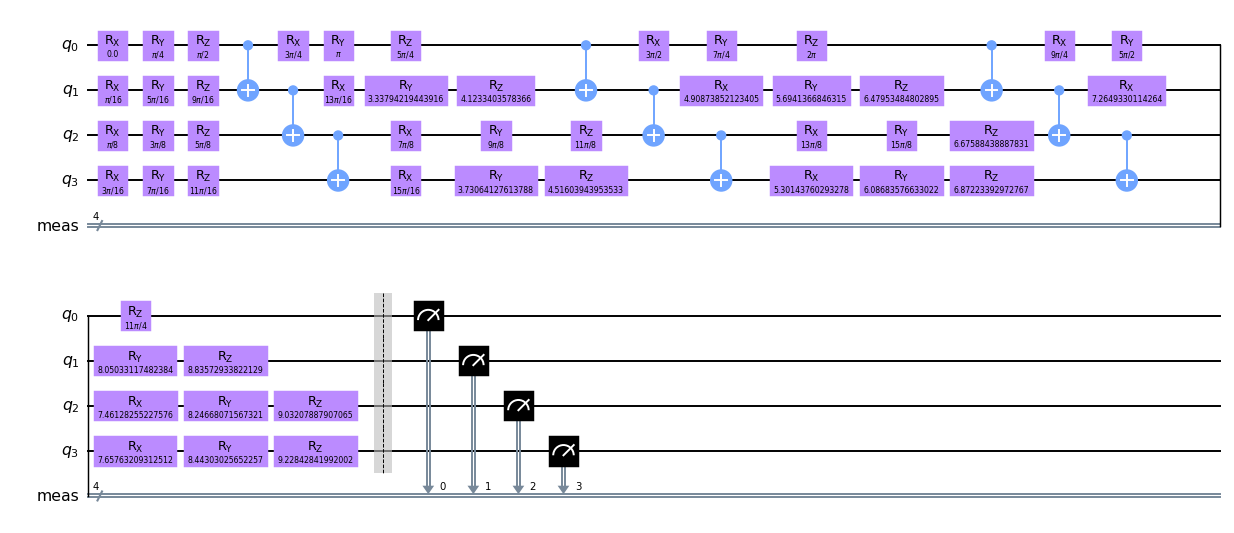

In [9]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2
from IPython.display import display


num_qubits = 4
circuit = EfficientSU2(
    num_qubits=num_qubits,
    reps=3,
    entanglement="linear",
    su2_gates=["rx", "ry", "rz"],
)
circuit.measure_all()
circuit = circuit.decompose()

params = [(np.pi * i) / 16 for i in range(len(circuit.parameters))]

circuit = circuit.bind_parameters(dict(zip(circuit.parameters, params)))
circ_cp = circuit.copy()
circuit.draw(output="mpl", scale=0.7)

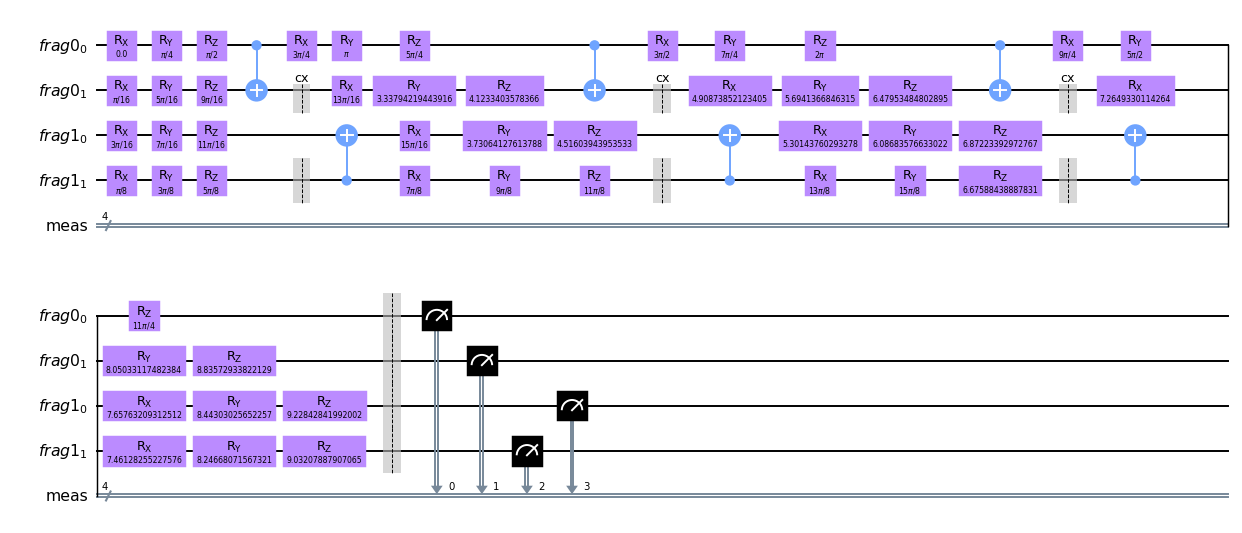

In [10]:
from qvm.cut_library.bisection import bisect

circuit = bisect(circuit)
circuit.draw(output="mpl", scale=0.7)

# from qvm.cut_library.util import extract_fragments

# circuits = extract_fragments(circuit)
# for circ in circuits.values():
#     display(circ.draw('mpl'))

{'1011': 0.04056250000000001, '1000': -0.0030749999999999996, '1110': 0.0791, '1111': 0.16385, '1101': 0.0875875, '1010': 0.15802500000000003, '0100': 0.026187500000000002, '1100': 0.03626250000000002, '0001': 0.002837499999999993, '0011': 0.143725, '0111': 0.0644125, '1001': 0.015300000000000005, '0110': 0.06195, '0101': 0.04773749999999998, '0000': 0.0020875000000000025, '0010': 0.07645000000000002}


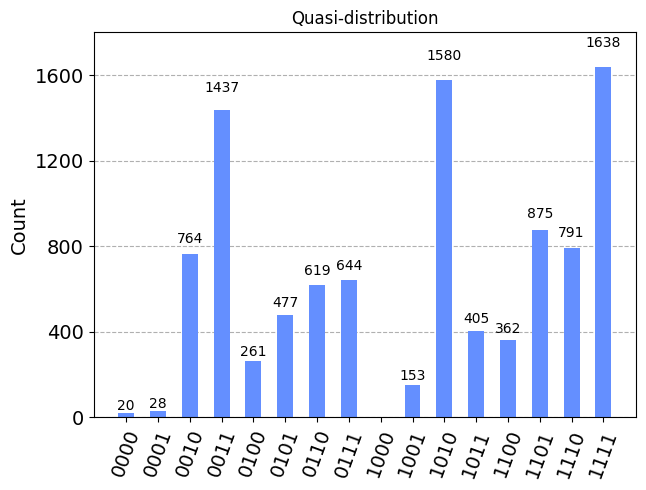

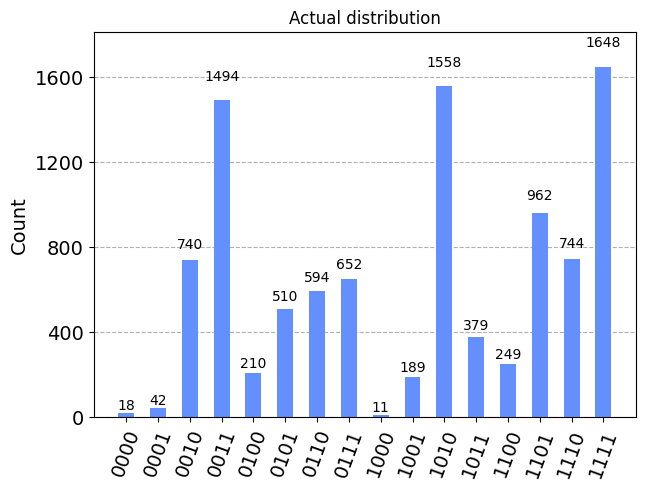

0.9967625309028333


In [11]:
from qvm.virtualizer import Virtualizer
from qiskit_aer import AerSimulator
from qvm.quasi_distr import QuasiDistr
from qiskit.visualization import plot_histogram

virtualizer = Virtualizer(circuit)
insts = virtualizer.instantiations()

counts = AerSimulator().run(insts, shots=10000).result().get_counts()
quasi_distrs = [QuasiDistr.from_counts(count, shots=10000) for count in counts]

from multiprocessing.pool import Pool

pool = Pool(1)
quasi_distr = virtualizer.knit(quasi_distrs, pool)
print(quasi_distr)

display(plot_histogram(quasi_distr.to_counts(10000), title="Quasi-distribution"))
actual_res = AerSimulator().run(circ_cp, shots=10000).result().get_counts()
display(plot_histogram(actual_res, title="Actual distribution"))


from qiskit.quantum_info import hellinger_fidelity

print(hellinger_fidelity(quasi_distr.to_counts(10000), actual_res))
